In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import re
from nltk.corpus import stopwords
import nltk
import string
import matplotlib.pyplot as plt
import random
%matplotlib inline
import os

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import decomposition, ensemble
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

import joblib

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os,boto3,sys,glob,json

### Part 1  Loading the  data 

In [2]:
# the data processing and saving the 2000 charts are done in IBCdata_prepare4modeling_April022019.ipynb
#trainDF=pd.read_csv('ibc_trainingdata_040219.csv')  # pd.read_csv('/home/jovyan/work/TinaZ/ibc_trainingdata_040219.csv')
#testDF=pd.read_csv('ibc_testingdata_040219.csv')   #   pd.read_csv('/home/jovyan/work/TinaZ/ibc_testingdata_040219.csv')
testDF=pd.read_csv('testdata4comp_050619.csv')
print(len(testDF))

30624


In [3]:
testDF.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'chart_id', 'created_at', 'submission_id',
       'user_id', 'code_id', 'diagnosis_id', 'isActive', 'status', 'ai',
       'annotation_id', 'deleted', 'deleted_reason', 'end', 'evidence',
       'selectedText', 'start', 'text', '75bef', '75aft', '25wordsbef',
       '25wordsaft', 'label', 'flag', '75char', 'text75', 'cleaned_data'],
      dtype='object')

In [4]:
testDF.drop(['Unnamed: 0', 'Unnamed: 0.1'],inplace=True, axis=1)

In [5]:
testDF.head()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,text,75bef,75aft,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data
0,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,F341,0a15e297-211e-4337-b990-1ed031e44368,True,NaN,True,134b625f-5507-4b23-8544-2ed06336cc1c,...,Dysthymic disorder,"edema, no erythema. ASSESSMENT Diagnoses a...","[ICD-10: F34.1], [ICD-9: 300.4], [SNOMED: 786...","no masses, BS normal. Extremities: FROM, no de...","[ICD-10: F34.1], [ICD-9: 300.4], [SNOMED: 786...",agreed,1,"edema, no erythema. ASSESSMENT Diagnoses a...","edema, no erythema. ASSESSMENT Diagnoses a...",edema erythema assessment diagnoses attached e...
1,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,F341,c3b4bacd-8b23-4cb1-9637-2d12afd702c3,True,NaN,True,bf0fb171-8ccb-4cff-b160-e13c28bc9e67,...,f34.1,MENT Diagnoses attached to this encounter: ...,"], [ICD-9: 300.4], [SNOMED: 78667006] Unspec...","normal. Extremities: FROM, no deformities, no ...","], [ICD-9: 300.4], [SNOMED: 78667006] Unspec...",agreed,1,MENT Diagnoses attached to this encounter: ...,MENT Diagnoses attached to this encounter: ...,ment diagnoses attached encounter dysthymic di...
2,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E039,18833cf3-b8e4-4623-81da-8df94629458a,True,NaN,True,4ba0d3bf-af6b-43dc-87c7-4be0d653e21d,...,e03.9,", [ICD-9: 300.4], [SNOMED: 78667006] Unspeci...","], [ICD-9: 244.9], [SNOMED: 40930008] Mixed h...",ASSESSMENT Diagnoses attached to this encou...,"], [ICD-9: 244.9], [SNOMED: 40930008] Mixed h...",agreed,1,", [ICD-9: 300.4], [SNOMED: 78667006] Unspeci...",", [ICD-9: 300.4], [SNOMED: 78667006] Unspeci...",icd9 3004 snomed 78667006 unspecified hypothyr...
3,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E039,6a6832d1-4976-4f8f-acdf-36079c004526,True,NaN,True,4321cd16-7060-4714-9a2e-19d8263ff6c8,...,Unspecified hypothyroidism,"Dysthymic disorder [ICD-10: F34.1], [ICD-9: ...","[ICD-10: E03.9], [ICD-9: 244.9], [SNOMED: 409...",no erythema. ASSESSMENT Diagnoses attached...,"[ICD-10: E03.9], [ICD-9: 244.9], [SNOMED: 409...",agreed,1,"Dysthymic disorder [ICD-10: F34.1], [ICD-9: ...","Dysthymic disorder [ICD-10: F34.1], [ICD-9: ...",dysthymic disorder icd10 f341 icd9 3004 snomed...
4,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E782,cba1d3fb-0c79-479b-a640-8a1886925ad9,True,NaN,True,b25c63b6-4802-4b31-a70f-b67b44eabe6b,...,Mixed hyperlipidemia,"cified hypothyroidism [ICD-10: E03.9], [ICD-9:...","[ICD-10: E78.2], [ICD-9: 272.2], [SNOMED: 267...",to this encounter: Dysthymic disorder [ICD-1...,"[ICD-10: E78.2], [ICD-9: 272.2], [SNOMED: 267...",agreed,1,"cified hypothyroidism [ICD-10: E03.9], [ICD-9:...","cified hypothyroidism [ICD-10: E03.9], [ICD-9:...",cified hypothyroidism icd10 e039 icd9 2449 sno...


In [6]:
# reverse it because it's reversed to the model
testDF['flag']=1-testDF['flag']

In [7]:
testDF['flag'].value_counts()

0    27353
1     3271
Name: flag, dtype: int64

In [8]:
testDF['label'].value_counts()

added      18334
agreed      9019
deleted     3271
Name: label, dtype: int64

In [9]:
testDF[['deleted','flag']].tail()

,deleted,flag
30619,False,0
30620,False,0
30621,False,0
30622,False,0
30623,False,0


In [10]:
len(testDF)

30624

In [11]:
nulltext=testDF[~pd.notnull(testDF['text'])] 
nulltext.head()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,text,75bef,75aft,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data
676,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,E119,701174f5-678b-4a1b-ad72-c93f3cce633e,True,confirmed,False,eb6e548a-ca50-43eb-ae6a-599441fde3fb,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
677,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,I10,9a8fc8c7-c891-4785-8864-dcd72804df24,True,undocumented,False,55c624eb-6c39-448c-86fe-45d32f9c9a89,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
678,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,E785,b61430c0-42ad-4fb6-9486-db11a4077069,True,undocumented,False,8d84c01a-fd8a-4e60-b0ee-799828a35771,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
679,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,E119,f4549f74-7616-4f66-91f8-483d0b1d3bbf,True,confirmed,False,5f7e98cf-d4ed-4072-a7c3-3ef8449a4ae9,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
680,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,L409,2b0212b4-45f1-4e68-ab4a-8a0ded70e450,True,illegible,False,6323c038-b5b5-4cbf-bedc-fb23625cedcf,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN


In [12]:
testDF = testDF[pd.notnull(testDF['text'])] 
len(testDF)

30277

In [13]:
nulltext=testDF[~pd.notnull(testDF['cleaned_data'])] 
nulltext.head()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,text,75bef,75aft,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data
71,IBXRMA2018_MULT_1218015600010001_HMK_3GM6V72QA...,2019-04-22T13:32:52.580Z,76735678-43d2-48d0-99eb-aa313a2090f8,ed.m.a.cabarrubias,N183,e70aa2d1-3bfb-4c57-b67e-821b13a0a78d,True,confirmed,False,fa97ab69-6b37-4343-ae80-20e279c563cc,...,"N18.3 Chronic kidney disease, stage 3 (moder...",NaN,"dney and Hypertension Assoc., P.C. Page 1 of 6...",,Mon 19 Nov 2018 11:19:17 AM EST215-741-351...,added,0,NaN,NaN,NaN
727,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,I480,ac0e0963-1fb9-4666-8ba2-0c0fbb8aebec,True,confirmed,False,498428fc-8c26-4f90-b74b-91788f3c08ea,...,Paroxysmal atrial anTation -148.0,NaN,POTTS. MICHAEL L eDoylestown Hea...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN
732,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,I482,04f7ed73-d4af-41d3-b1ff-5c76750beae9,True,confirmed,False,6bcf8631-efd2-4788-b58e-1442ce3fe842,...,Chmnic a-fib - L48.2,NaN,ary View for POTTS. MICHAEL L eD...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN
734,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,D6869,4cbc92ed-e61e-4fa6-9ea5-af29e9f662a4,True,confirmed,False,025e1f74-bad9-422d-beed-38ec11ce579d,...,Other thrombopinlia - D68.6g,NaN,for POTTS. MICHAEL L eDoylestow...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN
735,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,D6869,349f3f18-372c-4850-8170-b207b2962d43,True,confirmed,False,ef2ac439-1ea8-41ae-be76-ce3b1a5ecb28,...,Other thrombophilla,NaN,mary View for POTTS. MICHAEL L e...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN


In [14]:
testDF = testDF[pd.notnull(testDF['cleaned_data'])] 
len(testDF)

29124

In [15]:
testDF=testDF.reset_index(drop=True)
testDF.tail()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,text,75bef,75aft,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,"CAD, native vessel",ngue for chest pain may repeat in 5 minutes ma...,(ICD-414.01) (ICD10-125.10) Stable angina p...,0.4 mg subl (one tablet under the tongue for c...,(ICD-414.01) (ICD10-125.10) Stable angina p...,added,0,ngue for chest pain may repeat in 5 minutes ma...,ngue for chest pain may repeat in 5 minutes ma...,ngue chest pain may repeat minutes maximum tim...
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,CAD,"Y F CORBETT DOB: 12/10/1967 Provider: LaPorte,...",: Native Vessel : There are no ischemic sympto...,PA 19301 Phone: 610-647-4260 Fax: 610-647-74...,: Native Vessel : There are no ischemic sympto...,added,0,"Y F CORBETT DOB: 12/10/1967 Provider: LaPorte,...","Y F CORBETT DOB: 12/10/1967 Provider: LaPorte,...",corbett dob 12101967 provider laportesteven 10...
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,"Hyperlipidemia, mixed",dysfunction (ICD-403.11) (ICD10-112.0) Edema...,(ICD-272.2) (ICD10-E78.2). PHYSICAL EXAM ...,(ICD-414.01) (ICD10-125.10) Stable angina pe...,(ICD-272.2) (ICD10-E78.2). PHYSICAL EXAM ...,added,0,dysfunction (ICD-403.11) (ICD10-112.0) Edema...,dysfunction (ICD-403.11) (ICD10-112.0) Edema...,dysfunction icd40311 icd101120 edema icd7823 i...
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,E78.2,Edema (ICD-782.3) (ICD1O-R60.9) Hyperlipidem...,). PHYSICAL EXAM Vital Signs:BP: 130/84 mm...,Stable angina pectoris (ICD-413 9) Hyperten...,). PHYSICAL EXAM Vital Signs:BP: 130/84 mm...,added,0,Edema (ICD-782.3) (ICD1O-R60.9) Hyperlipidem...,Edema (ICD-782.3) (ICD1O-R60.9) Hyperlipidem...,edema icd7823 icd1or609 hyperlipidemia mixed i...
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,Hyperlipidemia: Mixed,"ollowed by Dr Han Edema: chronic Lymphedema,...",": lab is pending, he continues to take Atorva...","controlled, will continue current therapy. He ...",": lab is pending, he continues to take Atorva...",added,0,"ollowed by Dr Han Edema: chronic Lymphedema,...","ollowed by Dr Han Edema: chronic Lymphedema,...",ollowed dr han edema chronic lymphedema eviden...


In [16]:
testDF['chart_id'].nunique()

813

### Part 2 Loading all the models or locate the directory

#### Part 2.a. Load the 28 pickle files and run them on the testDF with selected chart_ids

In [20]:
files=glob.glob("../picklefolder_ngrams/pipeline_pickles/*.pickle")

In [21]:
files

['../picklefolder_ngrams/pipeline_pickles/Code_Cholesterol_5Mar.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeleteReason_FamilyHistory_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeletionReason_Negation_Feb26.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeletionReason_DoctorsNote_Feb27.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Code_Model2_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeletionReason_NotRelevant_Feb27.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Stroke_Feb1819.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Hypertension_Feb1819.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Emphysema_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Diabetes_Feb1819.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Depression_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Dementia_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Ckd_Mar5.pickle',
 '../picklefol

In [22]:
len(files)

29

In [27]:
files[7].split('/')[3].split('_')[1]

'Hypertension'

In [24]:
files[1].split('/')[3]

'DeleteReason_FamilyHistory_Mar5.pickle'

### Part 3. Apply models to test data

In [25]:
encoder = preprocessing.LabelEncoder()
test_y = encoder.fit_transform(testDF['flag'])  

In [26]:
code_list={}
code_list["Model1"]=['I10','E119']
code_list["Model2"]=['I2510','E785','K219','F329','I639']
code_list["Model3"]=['I739','N183','Z992','B20','I213','R569','I43','J410','I714','R579','E550','I209','J45998','I480','B182','K210','K739']
code_list["Heart"]=['I509','I482','I4891','I82401']
code_list["Depression"]=['F411','F410','F40240','F458','F409','F4000','F4001','F445','F444','F40243','F446','F4010','F442','F408','F449','F451']
code_list["Kidney"]=['N189','N181','N182','E1122','I130','E0822','E1022']
code_list["Diabetes"]=['Z794','E109','E119','E139','E089','E099']
code_list["Cancer"]=['C801','C50919','C189']
code_list["COPD"]=['J449','J45909']
code_list["Cholesterol"]=['E780','E785','E782','E789','E7800','E784','E781','E7801','E7881','E882','E783','E786','E7889','E756','E755','E7130']

In [28]:
allpredict=pd.DataFrame()   # create an empty dataframe, to save the prediction result for each model
allprob=pd.DataFrame()
print(allpredict)

Empty DataFrame
Columns: []
Index: []


In [29]:
f = open("allmodeltestscore_0506.txt", "w+")  # save all the score to this file

indexdf=pd.DataFrame()    # create a dataframe, otherwise can use testDF for merging to obtain the prediction matched to index
# because for some model testing, we only select partial data, like phrase-based model, code-based model
for i in range(len(files)):
    model_pipeline = joblib.load(files[i])
    f = open("allmodeltestscore_0506.txt", "a+")
    # deletion model
    if(files[i].split('/')[3].startswith('D')):
        try:
            testDF1=testDF   # no selection, run for all instances
            indexdf[i]= [1 for i in range(len(testDF))]
        except:
            print('no data for this model')
        
    elif(files[i].split('/')[3].startswith('P')):
    # if it's phrase-based model, use the following way to select data
        
        phrase=files[i].split('/')[3].split('_')[1]
        try:
            testDF1 = testDF[testDF['text'].str.contains(phrase,flags=re.IGNORECASE)]
            temp=testDF1.index.tolist()
            indexdf[i]=[1 if i in (temp) else 0 for i in range(len(testDF))]
        except:
            print('no data for this model')

    elif(files[i].split('/')[3].startswith('C')):
    # if it's code based model, use the following way to select model
        codereason=files[i].split('/')[3].split('_')[1]
        try:
            testDF1 = testDF[testDF['code_id'].isin(code_list[codereason])]
            temp=testDF1.index.tolist()
            indexdf[i]=[1 if i in (temp) else 0 for i in range(len(testDF))]
        except:
            print('no data for this model')
    else:
        print('not a valid/good model name probably...')

    #print(files[i])
    # how to put the prediction on the right index?
    try:
        test=testDF1['cleaned_data']
        prediction = model_pipeline.predict(test)
        proba = model_pipeline.predict_proba(test)[:,1]
        #y_pred = []   # choose the probability for predicting 1 that's the second column
        #for row in pred:
       #     y_pred.append(row[1])
       # y_pred = np.array(y_pred)

        testDF1['key']=testDF1.index
        testDF1['pred']=prediction
        testDF1['prob']= proba

        indexdf['key']=indexdf.index
        merged=pd.merge(indexdf,testDF1,on='key',how='outer')  # maintain the position of the perdiction, match to the right index
        allpredict[i]=merged['pred']    # save the prediction to corresponding dataframe
        allprob[i]=merged['prob']   # save the probability

        # the following just generate accuracy report for each model
        conf_mat = confusion_matrix(testDF1['flag'], prediction)
        df_cm = pd.DataFrame(conf_mat, range(2),
                      range(2))
        #sns.set(font_scale=1.4)#for label size
        #sns.heatmap(df_cm, annot=True, fmt='d')
        #print(classification_report(prediction, testDF1['flag']))
        #conf_mat = confusion_matrix(test_y, allpredict1)
        tn, fp, fn, tp = conf_mat.ravel()
        report = classification_report(testDF1['flag'], prediction)
        lines = report.split('\n')
        #print(lines[2])
        row_data = lines[3].split('      ')
        print("testing model:",(files[i]))
        print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
        print(accuracy_score(testDF1['flag'],prediction),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)  

        f.write("testing model: %s\n" % files[i])
        f.write("accuracy_score recall precision  f1_score tn  fn  fp  tp\n")
        f.write("%f %f %f %f %f %f %f %f \n" % (accuracy_score(testDF1['flag'],prediction),float(row_data[2]),float(row_data[3]),float(row_data[4]), tn, fn, fp, tp)) 
    except:
        print('no data for this model')
#print(allpredict)
#f.close()

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Cholesterol_5Mar.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8280254777070064  0.10 0.05 0.06 3872 570 240 28


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/DeleteReason_FamilyHistory_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8820217003158907  0.14 0.01 0.02 25656 3238 198 32
testing model: ../picklefolder_ngrams/pipeline_pickles/DeletionReason_Negation_Feb26.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8773176761433868  0.16 0.02 0.04 25482 3201 372 69
testing model: ../picklefolder_ngrams/pipeline_pickles/DeletionReason_DoctorsNote_Feb27.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8680813075127043  0.10 0.02 0.04 25212 3200 642 70


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Model2_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8384392131570461  0.11 0.04 0.06 5166 722 280 34
testing model: ../picklefolder_ngrams/pipeline_pickles/DeletionReason_NotRelevant_Feb27.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8289039967037495  0.07 0.05 0.06 23993 3122 1861 148
testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Stroke_Feb1819.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.0  0.00 0.00 0.00 0 1 2 0
testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Hypertension_Feb1819.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8592493297587132  0.03 0.00 0.01 3844 560 70 2


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.


testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Emphysema_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7777777777777778  0.00 0.00 0.00 56 8 8 0
testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Diabetes_Feb1819.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8322649572649573  0.02 0.02 0.02 1555 145 169 3


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Depression_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7188405797101449  0.51 0.59 0.55 189 41 56 59


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Dementia_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8157894736842105  0.00 0.00 0.00 124 9 19 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Ckd_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7377777777777778  0.02 0.12 0.03 165 7 52 1
testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Cholesterol_Feb1819.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.6925925925925925  0.02 0.05 0.02 372 40 126 2


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Cancer_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7413793103448276  0.12 0.30 0.17 83 7 23 3
testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_CAD_Feb1819.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8694267515923567  0.00 0.00 0.00 273 15 26 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Asthma_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7507598784194529  0.06 0.08 0.07 244 34 48 3


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Phrase_Aneurysm_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.5845070422535211  0.02 0.06 0.03 82 16 43 1
testing model: ../picklefolder_ngrams/pipeline_pickles/DeletionReason_Screening_Feb25.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8843565444307101  0.29 0.02 0.04 25688 3202 166 68


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/DeleteReason_Phone_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.59644966350776  0.06 0.18 0.09 16796 2695 9058 575


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Model3_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7929383602633154  0.02 0.02 0.02 1321 167 179 4


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Model1_19Feb.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8091623746272703  0.05 0.03 0.04 5944 901 507 26


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Kidney_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.6071428571428571  0.02 0.20 0.04 268 16 160 4


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Heart_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.671990171990172  0.06 0.19 0.09 534 54 213 13


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Diabetes_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7265774378585086  0.08 0.26 0.12 1111 82 347 29


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Depression_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7363636363636363  0.00 0.00 0.00 81 9 20 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_COPD_Mar5.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7941415785191213  0.05 0.02 0.02 973 191 62 3


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/Code_Cancer_5Mar.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.4819277108433735  0.00 0.00 0.00 40 3 40 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid resul

testing model: ../picklefolder_ngrams/pipeline_pickles/DeleteReason_PMH_RF.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8255390743029803  0.08 0.05 0.07 23864 3091 1990 179


####  Part 2.b. Now get the prediction and probability dataframes and merge with testDF which has all the chart_id etc info

In [30]:
allpredict.isnull().sum()  # a lot of nulls because not all data are run for each model, but for deletion model, all are run

0     24414
1         0
2         0
3         0
4     22922
5         0
6     29121
7     24648
8     29052
9     27252
10    28779
11    28972
12    28899
13    28584
14    29008
15    28810
16    28795
17    28982
18        0
19        0
20    27453
21    21746
22    28676
23    28310
24    27555
25    29014
26    27895
27    29041
28        0
dtype: int64

In [31]:
allpredict.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [32]:
allprob.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,NaN,0.001774,0.000824,0.001376,NaN,0.019535,NaN,NaN,NaN,NaN,...,0.194037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,0.004935,0.000254,0.008852,NaN,0.044671,NaN,NaN,NaN,NaN,...,0.223320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,0.001282,0.000083,0.004569,NaN,0.266182,NaN,NaN,NaN,NaN,...,0.239012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4
3,NaN,0.001031,0.000092,0.000677,NaN,0.138967,NaN,NaN,NaN,NaN,...,0.107667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
4,0.287076,0.001175,0.000028,0.002402,NaN,0.025434,NaN,NaN,NaN,NaN,...,0.303654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2


In [33]:
len(allpredict)

29124

In [34]:
len(testDF)

29124

In [35]:
# the data frame for predictions from each model
#merge to testDF to keep the Nan, which means not omputed for that instance
#testDF2=pd.concat([testDF,allpredict],axis=1)
#len(testDF2)
testDF['index']=testDF.index
allpredict['index']=allpredict.index
df_pred = pd.merge(testDF,allpredict, how='left', on = 'index')
len(df_pred)

29124

In [36]:
df_pred.tail()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,19,20,21,22,23,24,25,26,27,28
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [37]:
# now the data frame with probabilities
testDF['index']=testDF.index
allprob['index']=allprob.index
df_prob = pd.merge(testDF,allprob, how='left', on = 'index')
print(len(df_prob))

29124


In [38]:
df_prob.tail()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,19,20,21,22,23,24,25,26,27,28
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,0.564660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,0.847657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,0.193743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,0.181966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,0.389273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1


#### Part 2.c. Now combine the prediction from 28 models to make one prediction,it's actually an or operation, but here using sum()

In [39]:
allprob.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,index
0,NaN,0.001774,0.000824,0.001376,NaN,0.019535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,NaN,0.004935,0.000254,0.008852,NaN,0.044671,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
2,NaN,0.001282,0.000083,0.004569,NaN,0.266182,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,2
3,NaN,0.001031,0.000092,0.000677,NaN,0.138967,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,3
4,0.287076,0.001175,0.000028,0.002402,NaN,0.025434,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,4


In [40]:
allpredictNan=allpredict   # keep the original NaN if that row is not computed for that model
allpredict=allpredict.fillna(0) # fill the NaNs by zero , for computation I need to fill Nan to a number 0 

In [41]:
allpredictNan.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,index
0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
4,0.0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4


In [42]:
#allpredict=allpredictNan
#allpredict=allpredict.fillna(0)
allpredict.drop(['index'],inplace=True, axis=1)  # need to drop this column
allpredict.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [43]:
# sum across the row and if any is greater than 0, it's a deletion
# important, this is how I combine prediction from each model and give the one prediction

allpredict['Sum'] = allpredict.sum(axis = 1, skipna = True) 
df_pred['all_model_pred']=[1 if allpredict['Sum'].iloc[i]>=1 else 0 for i in range(len(allpredict))] 

In [44]:
# check how many 1s are predicted 
allpredict1=df_pred['all_model_pred']
print(sum(allpredict1))
print(len(allpredict1))  # only a small percentage are predicted as deletion

12113
29124


In [ ]:
# if drop column 19 which is phone related, see if it can improve accuracy

In [83]:
allpredict.drop([19],inplace=True, axis=1)
allpredict.drop(['Sum'],inplace=True, axis=1)
allpredict.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20, 21, 22, 23, 24, 25, 26, 27, 28],
      dtype='object')

In [84]:
allpredict['Sum'] = allpredict.sum(axis = 1, skipna = True) 
df_pred['all_model_pred_drop19']=[1 if allpredict['Sum'].iloc[i]>=1 else 0 for i in range(len(allpredict))] 

In [88]:
# check how many 1s are predicted 
allpredict1=df_pred['all_model_pred_drop19']
print(sum(allpredict1))
print(len(allpredict1))

6146
29124


In [85]:
df_pred.tail()  
#all_model_pred is check any model output is 1 for that instance

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,Code_Model1,Code_Kidney,Code_Heart,Code_Diabetes,Code_Depression,Code_COPD,Code_Cancer,DeleteReason_PMH,all_model_pred,all_model_pred_drop19
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


#### Change the columns names from number to the correponding model name

In [47]:
df_prob.columns

Index([      'chart_id',     'created_at',  'submission_id',        'user_id',
              'code_id',   'diagnosis_id',       'isActive',         'status',
                   'ai',  'annotation_id',        'deleted', 'deleted_reason',
                  'end',       'evidence',   'selectedText',          'start',
                 'text',          '75bef',          '75aft',     '25wordsbef',
           '25wordsaft',          'label',           'flag',         '75char',
               'text75',   'cleaned_data',            'key',           'pred',
                 'prob',          'index',                0,                1,
                      2,                3,                4,                5,
                      6,                7,                8,                9,
                     10,               11,               12,               13,
                     14,               15,               16,               17,
                     18,               19,          

In [48]:
# drop the key and predict prob temp columns
df_pred.drop(['key','pred','prob'],inplace=True, axis=1)
df_prob.drop(['key','pred','prob'],inplace=True, axis=1)

In [49]:
files

['../picklefolder_ngrams/pipeline_pickles/Code_Cholesterol_5Mar.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeleteReason_FamilyHistory_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeletionReason_Negation_Feb26.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeletionReason_DoctorsNote_Feb27.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Code_Model2_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/DeletionReason_NotRelevant_Feb27.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Stroke_Feb1819.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Hypertension_Feb1819.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Emphysema_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Diabetes_Feb1819.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Depression_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Dementia_Mar5.pickle',
 '../picklefolder_ngrams/pipeline_pickles/Phrase_Ckd_Mar5.pickle',
 '../picklefol

In [50]:
# rename the number columns to columns names
col_dict = {0: 'Code_Cholesterol', 1: 'DeleteReason_FamilyHistory',2:'DeletionReason_Negation',3:'DeletionReason_DoctorsNote',4:'Code_Model2',
           5:'DeletionReason_NotRelevant',6:'Phrase_Stroke',7:'Phrase_Hypertension',8:'Phrase_Emphysema',9:'Phrase_Diabetes',10:'Phrase_Depression',
           11:'Phrase_Dementia',12:'Phrase_Ckd',13:'Phrase_Cholesterol',14:'Phrase_Cancer',15:'Phrase_CAD',
           16:'Phrase_Asthma',17:'Phrase_Aneurysm',18:'DeletionReason_Screening',19:'DeleteReason_Phone',20:'Code_Model3',21:'Code_Model1',
            22:'Code_Kidney',23:'Code_Heart',24:'Code_Diabetes',
           25:'Code_Depression',26:'Code_COPD',27:'Code_Cancer',
            28:'DeleteReason_PMH'
           }   ## key→old name, value→new name

df_pred.columns = [col_dict.get(x, x) for x in df_pred.columns]
df_prob.columns = [col_dict.get(x, x) for x in df_prob.columns]

In [51]:
df_pred.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end', 'evidence', 'selectedText', 'start', 'text',
       '75bef', '75aft', '25wordsbef', '25wordsaft', 'label', 'flag', '75char',
       'text75', 'cleaned_data', 'index', 'Code_Cholesterol',
       'DeleteReason_FamilyHistory', 'DeletionReason_Negation',
       'DeletionReason_DoctorsNote', 'Code_Model2',
       'DeletionReason_NotRelevant', 'Phrase_Stroke', 'Phrase_Hypertension',
       'Phrase_Emphysema', 'Phrase_Diabetes', 'Phrase_Depression',
       'Phrase_Dementia', 'Phrase_Ckd', 'Phrase_Cholesterol', 'Phrase_Cancer',
       'Phrase_CAD', 'Phrase_Asthma', 'Phrase_Aneurysm',
       'DeletionReason_Screening', 'DeleteReason_Phone', 'Code_Model3',
       'Code_Model1', 'Code_Kidney', 'Code_Heart', 'Code_Diabetes',
       'Code_Depression', 'Code_COPD', 'Code_Cancer', 'DeleteReason_PMH',
       'all_model_pr

In [52]:
df_prob.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end', 'evidence', 'selectedText', 'start', 'text',
       '75bef', '75aft', '25wordsbef', '25wordsaft', 'label', 'flag', '75char',
       'text75', 'cleaned_data', 'index', 'Code_Cholesterol',
       'DeleteReason_FamilyHistory', 'DeletionReason_Negation',
       'DeletionReason_DoctorsNote', 'Code_Model2',
       'DeletionReason_NotRelevant', 'Phrase_Stroke', 'Phrase_Hypertension',
       'Phrase_Emphysema', 'Phrase_Diabetes', 'Phrase_Depression',
       'Phrase_Dementia', 'Phrase_Ckd', 'Phrase_Cholesterol', 'Phrase_Cancer',
       'Phrase_CAD', 'Phrase_Asthma', 'Phrase_Aneurysm',
       'DeletionReason_Screening', 'DeleteReason_Phone', 'Code_Model3',
       'Code_Model1', 'Code_Kidney', 'Code_Heart', 'Code_Diabetes',
       'Code_Depression', 'Code_COPD', 'Code_Cancer', 'DeleteReason_PMH'],
      dtype='object

#### change the columns names and also compare the probability and prediction to see if they match

In [53]:
df_pred.rename(columns={'start': 'start_offset', 'end': 'end_offset'}, inplace=True)

In [55]:
df_pred[['chart_id','start_offset','end_offset','DeleteReason_Phone']].head()

,chart_id,start_offset,end_offset,DeleteReason_Phone
0,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8494,8512,0
1,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8522,8527,0
2,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8603,8608,0
3,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8567,8593,0
4,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8647,8667,0


In [56]:
df_prob.rename(columns={'start': 'start_offset', 'end': 'end_offset'}, inplace=True)
df_prob[['chart_id','start_offset','end_offset','DeleteReason_Phone']].head()  #ok make sense

,chart_id,start_offset,end_offset,DeleteReason_Phone
0,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8494,8512,0.194037
1,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8522,8527,0.223320
2,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8603,8608,0.239012
3,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8567,8593,0.107667
4,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8647,8667,0.303654


In [57]:
print(len(set(df_pred['chart_id'].tolist())))
print(len(set(df_prob['chart_id'].tolist())))   # 813 unique chart ids

813
813


### Part 4. Compare with pipeline feedback and do some tweak and compare again

In [58]:
df_pred.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end_offset', 'evidence', 'selectedText',
       'start_offset', 'text', '75bef', '75aft', '25wordsbef', '25wordsaft',
       'label', 'flag', '75char', 'text75', 'cleaned_data', 'index',
       'Code_Cholesterol', 'DeleteReason_FamilyHistory',
       'DeletionReason_Negation', 'DeletionReason_DoctorsNote', 'Code_Model2',
       'DeletionReason_NotRelevant', 'Phrase_Stroke', 'Phrase_Hypertension',
       'Phrase_Emphysema', 'Phrase_Diabetes', 'Phrase_Depression',
       'Phrase_Dementia', 'Phrase_Ckd', 'Phrase_Cholesterol', 'Phrase_Cancer',
       'Phrase_CAD', 'Phrase_Asthma', 'Phrase_Aneurysm',
       'DeletionReason_Screening', 'DeleteReason_Phone', 'Code_Model3',
       'Code_Model1', 'Code_Kidney', 'Code_Heart', 'Code_Diabetes',
       'Code_Depression', 'Code_COPD', 'Code_Cancer', 'DeleteReason_PMH',
      

In [59]:
df_pred['label'].value_counts()

added      16835
agreed      9019
deleted     3270
Name: label, dtype: int64

In [61]:
df_pred['flag'].value_counts()  # 0 is agree+added 1 is deletion

0    25854
1     3270
Name: flag, dtype: int64

In [60]:
df_pred['deleted_reason'].value_counts()

Wrong DOS                                      2187
other                                          2170
not_relevant                                    590
incorrect_spec                                  239
Incorrect Specification - Non-Risk Adjusted     135
not_doctors_note                                101
incorrect_year_of_service                        95
repeated_instance                                91
preventative_screening                           56
family_history                                   14
negation                                         11
Active Diagnosis Code                             8
incorrect_acronym                                 7
incorrect_version                                 2
Name: deleted_reason, dtype: int64

In [62]:
# now convert to the convention of 1 is agreed, 0 is deletion
df_pred['all_model_pred']=1-df_pred['all_model_pred']    # the predicted value
df_pred['flag']=1-df_pred['flag']     # the true value

In [63]:
df_pred['flag'].value_counts()  # in line with above 

1    25854
0     3270
Name: flag, dtype: int64

In [64]:
df_pred['all_model_pred'].value_counts()

1    17011
0    12113
Name: all_model_pred, dtype: int64

In [65]:
agreedperct=len(df_pred[(df_pred['all_model_pred']==1) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['all_model_pred']==1) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['all_model_pred']==0) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.7856746867723694
added percentage:  0.44555984555984557
deleted percentage:  0.25871559633027524


Test accuracy is 0.5299066062354072
              precision    recall  f1-score   support

           0       0.07      0.26      0.11      3270
           1       0.86      0.56      0.68     25854

   micro avg       0.53      0.53      0.53     29124
   macro avg       0.46      0.41      0.40     29124
weighted avg       0.77      0.53      0.62     29124

accuracy_score recall precision  f1_score tn  fn  fp  tp
0.5299066062354072  0.86 0.56 0.68     25854 846 11267 2424 14587


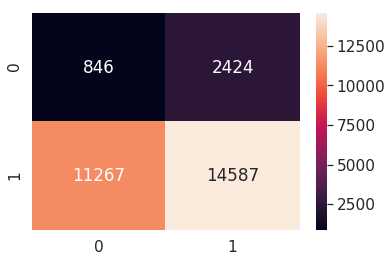

In [66]:
print('Test accuracy is {}'.format(accuracy_score(df_pred['flag'], df_pred['all_model_pred'])))
conf_mat = confusion_matrix(df_pred['flag'], df_pred['all_model_pred'])
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(df_pred['flag'],df_pred['all_model_pred']))


#conf_mat = confusion_matrix(test_y, allpredict1)
tn, fp, fn, tp = conf_mat.ravel()
report = classification_report(df_pred['flag'], df_pred['all_model_pred'])
lines = report.split('\n')
    #print(lines[2])
row_data = lines[3].split('      ')
print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
print(accuracy_score(df_pred['flag'], df_pred['all_model_pred']),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)

In [108]:
# comparison of dropping phone model
df_pred['all_model_pred_drop19']=1-df_pred['all_model_pred_drop19'] 
agreedperct=len(df_pred[(df_pred['all_model_pred_drop19']==1) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['all_model_pred_drop19']==1) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['all_model_pred_drop19']==0) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.9038696086040581
added percentage:  0.7155331155331155
deleted percentage:  0.14984709480122324


Test accuracy is 0.7103419859909353
              precision    recall  f1-score   support

           0       0.08      0.15      0.10      3270
           1       0.88      0.78      0.83     25854

   micro avg       0.71      0.71      0.71     29124
   macro avg       0.48      0.47      0.47     29124
weighted avg       0.79      0.71      0.75     29124

accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7103419859909353  0.88 0.78 0.83     25854 490 5656 2780 20198


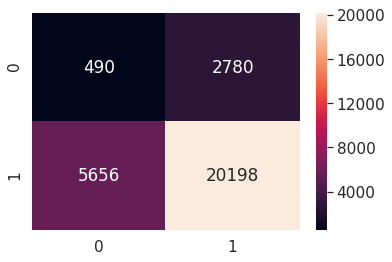

In [109]:
# if drop the phone model from the final prediction
print('Test accuracy is {}'.format(accuracy_score(df_pred['flag'], df_pred['all_model_pred_drop19'])))
conf_mat = confusion_matrix(df_pred['flag'], df_pred['all_model_pred_drop19'])
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(df_pred['flag'],df_pred['all_model_pred_drop19']))


#conf_mat = confusion_matrix(test_y, allpredict1)
tn, fp, fn, tp = conf_mat.ravel()
report = classification_report(df_pred['flag'], df_pred['all_model_pred_drop19'])
lines = report.split('\n')
    #print(lines[2])
row_data = lines[3].split('      ')
print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
print(accuracy_score(df_pred['flag'], df_pred['all_model_pred_drop19']),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)

In [92]:
# now combine with refreshed model output
df_pred_refreshed=pd.read_csv('refreshed_output1000chart.csv')

df_pred['refreshed_pred']=df_pred_refreshed['all_model_pred']

In [104]:
df_pred['combine_2sets']= 1-((1-df_pred['refreshed_pred'])|(1-df_pred['all_model_pred']))

In [102]:
(1-df_pred['all_model_pred']).sum()  # number of deletions from pipeline models

12113

In [106]:
(1-df_pred['refreshed_pred']).sum()   # refreshed model deletion number

1895

In [107]:
(1-df_pred['combine_2sets']).sum()    # combine two sets result in more deletion

12304

In [ ]:
# now compare with some individual models, be aware that my individual model result still is 0 keep, 1 deletion


In [67]:
df_pred['DeleteReason_Phone'].value_counts() 

0    19491
1     9633
Name: DeleteReason_Phone, dtype: int64

In [68]:
df_pred[df_pred['DeleteReason_Phone']==1].text  # these are  too many instances deleted by phone model

17                                atrial fibrillation
20                    gastroesophageal reflux disease
36                 e78.5: hyperlipidemia  unspecified
37                                       Dyslipidemia
49                                             REFLUX
50                                             E78.00
53                                       Hypertension
64                                       CKD, stage 1
65                            hypertension  essential
67                                       hypertension
70                                           diabetes
71                    CHRONIC KIDNEY DISEASE: Stage 3
73                                       DYSLIPIDEMIA
74                                Atrial Fibrillation
78                                               GERD
79                                          heartburn
82                                               GERD
83                                               GERD
85                          

In [70]:
# now check phone model only
agreedperct=len(df_pred[(df_pred['DeleteReason_Phone']==0) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['DeleteReason_Phone']==0) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['DeleteReason_Phone']==1) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.8530879254906308
added percentage:  0.5406593406593406
deleted percentage:  0.17584097859327216


In [72]:
agreedperct=len(df_pred[(df_pred['DeletionReason_Screening']==0) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['DeletionReason_Screening']==0) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['DeletionReason_Screening']==1) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.9977824592526887
added percentage:  0.9913275913275913
deleted percentage:  0.020795107033639144


In [71]:
df_pred.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end_offset', 'evidence', 'selectedText',
       'start_offset', 'text', '75bef', '75aft', '25wordsbef', '25wordsaft',
       'label', 'flag', '75char', 'text75', 'cleaned_data', 'index',
       'Code_Cholesterol', 'DeleteReason_FamilyHistory',
       'DeletionReason_Negation', 'DeletionReason_DoctorsNote', 'Code_Model2',
       'DeletionReason_NotRelevant', 'Phrase_Stroke', 'Phrase_Hypertension',
       'Phrase_Emphysema', 'Phrase_Diabetes', 'Phrase_Depression',
       'Phrase_Dementia', 'Phrase_Ckd', 'Phrase_Cholesterol', 'Phrase_Cancer',
       'Phrase_CAD', 'Phrase_Asthma', 'Phrase_Aneurysm',
       'DeletionReason_Screening', 'DeleteReason_Phone', 'Code_Model3',
       'Code_Model1', 'Code_Kidney', 'Code_Heart', 'Code_Diabetes',
       'Code_Depression', 'Code_COPD', 'Code_Cancer', 'DeleteReason_PMH',
      

In [73]:
agreedperct=len(df_pred[(df_pred['DeleteReason_PMH']==0) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['DeleteReason_PMH']==0) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['DeleteReason_PMH']==1) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.9442288502051225
added percentage:  0.9116721116721117
deleted percentage:  0.05474006116207951


In [74]:
agreedperct=len(df_pred[(df_pred['DeletionReason_DoctorsNote']==0) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['DeletionReason_DoctorsNote']==0) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['DeletionReason_DoctorsNote']==1) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.9951214103559153
added percentage:  0.9644787644787645
deleted percentage:  0.021406727828746176


In [75]:
agreedperct=len(df_pred[(df_pred['DeletionReason_Negation']==0) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['DeletionReason_Negation']==0) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['DeletionReason_Negation']==1) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.9976715822153233
added percentage:  0.9791505791505791
deleted percentage:  0.02110091743119266


In [76]:
agreedperct=len(df_pred[(df_pred['DeleteReason_FamilyHistory']==0) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['DeleteReason_FamilyHistory']==0) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['DeleteReason_FamilyHistory']==1) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.9973389511032266
added percentage:  0.9896643896643896
deleted percentage:  0.009785932721712538


In [77]:
agreedperct=len(df_pred[(df_pred['DeletionReason_NotRelevant']==0) & (df_pred['label']=='agreed') ])/len(df_pred[df_pred['label']=='agreed'])  
addedperct=len(df_pred[(df_pred['DeletionReason_NotRelevant']==0) & (df_pred['label']=='added') ])/len(df_pred[df_pred['label']=='added'])   
deletedperct=len(df_pred[(df_pred['DeletionReason_NotRelevant']==1) & (df_pred['label']=='deleted') ])/len(df_pred[df_pred['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.9869165095908637
added percentage:  0.8964656964656965
deleted percentage:  0.04525993883792049
